In [1]:
import pandas as pd
import numpy as np
import bluebelt as blue
import matplotlib.pyplot as plt

In [2]:
nrows = 365
ncols = 6

np.random.seed(27)
series = pd.Series(np.random.weibull(7,nrows) * 100, index=pd.date_range(start='1-1-2020', periods=nrows), name='process A')
frame = pd.DataFrame(np.random.normal(loc=100, scale=20, size=ncols*nrows).reshape(nrows, ncols), index=pd.date_range(start='1-1-2020', periods=nrows), columns=[f'process {col}' for col in range(1, ncols+1)])

In [3]:
series

2020-01-01     91.924281
2020-01-02    107.740009
2020-01-03    104.152804
2020-01-04    110.604887
2020-01-05     90.139313
                 ...    
2020-12-26     79.218044
2020-12-27     98.073502
2020-12-28     79.476995
2020-12-29    110.444600
2020-12-30     81.448880
Freq: D, Name: process A, Length: 365, dtype: float64

In [36]:
params = series.blue.pattern.polynomial(shape=3).polyfit

In [133]:
params

array([ 9.74301467e+01, -1.13681080e-02,  1.73173678e-05, -1.98412611e-08])

In [134]:
def derivative(array):
    der = []
    for i, val in enumerate(array[1:]):
        der += [(i+1)*val]
    return np.array(der)

In [135]:
derivative(params)

array([-1.13681080e-02,  3.46347355e-05, -5.95237832e-08])

In [28]:
params.deriv()

AttributeError: 'numpy.ndarray' object has no attribute 'deriv'

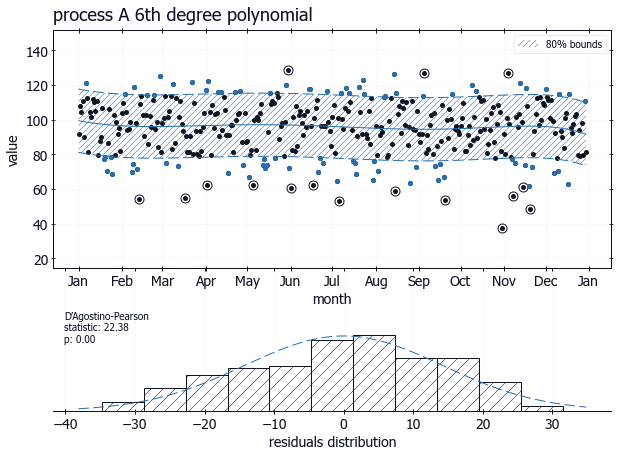

In [131]:
series.blue.pattern.polynomial().plot()

In [29]:
from numpy.polynomial import Polynomial

In [30]:
series

2020-01-01     91.924281
2020-01-02    107.740009
2020-01-03    104.152804
2020-01-04    110.604887
2020-01-05     90.139313
                 ...    
2020-12-26     79.218044
2020-12-27     98.073502
2020-12-28     79.476995
2020-12-29    110.444600
2020-12-30     81.448880
Freq: D, Name: process A, Length: 365, dtype: float64

In [130]:
Polynomial.fit(series.index.day, series.values, 4)

Polynomial([ 93.74287659,   0.61900441,  12.18256375,  -3.27403094,
       -15.27653959], domain=[ 1., 31.], window=[-1.,  1.])

In [126]:
xx, yy = Polynomial.fit(series.index.day, series.values, 2).linspace()

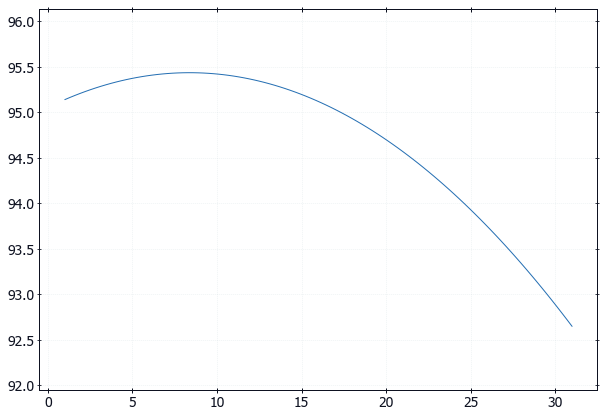

In [127]:
plt.plot(xx,yy)

In [129]:
series.blue.pattern.polynomial(shape=2).polyfit

array([ 9.73831698e+01, -9.79381496e-03,  6.47656005e-06])

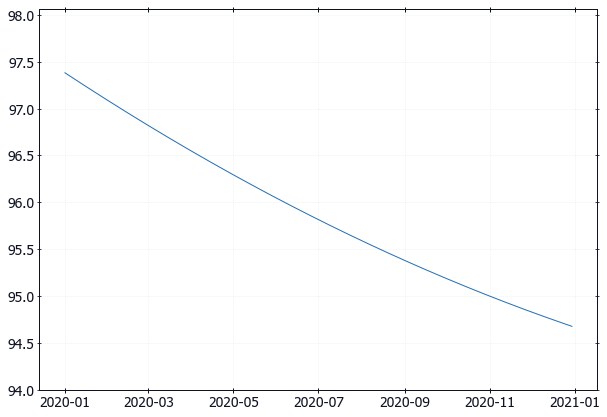

In [116]:
plt.plot(series.blue.pattern.polynomial(shape=2).result)

In [93]:
np.polynomial.polynomial.polyfit(series.index.day, series.values, 3)

array([ 9.63166522e+01, -3.53220428e-01,  2.92179271e-02, -7.32970563e-04])

In [56]:
1.2034192944594695 * 0.06666666666666667

0.08022795296396464